In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the CLEANED dataset
df = pd.read_csv("../data/insurance_cleaned.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [54]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)


In [58]:
# ---- LINEAR REGRESSION METRICS (RE-RUN IF VARIABLES WERE LOST) ----
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("LINEAR REGRESSION RESULTS")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


LINEAR REGRESSION RESULTS
MAE: 4177.04556103632
MSE: 35478020.675235614
RMSE: 5956.342894363589
R2: 0.8069287081198011


In [59]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 35478020.675235614
RMSE: 5956.342894363589
R² Score: 0.8069287081198011


In [60]:
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
4,smoker_yes,23077.764593
2,children,533.009989
1,bmi,318.701441
0,age,248.210720
3,sex_male,-101.542054
5,region_northwest,-391.761455
7,region_southwest,-659.139752
6,region_southeast,-838.919616


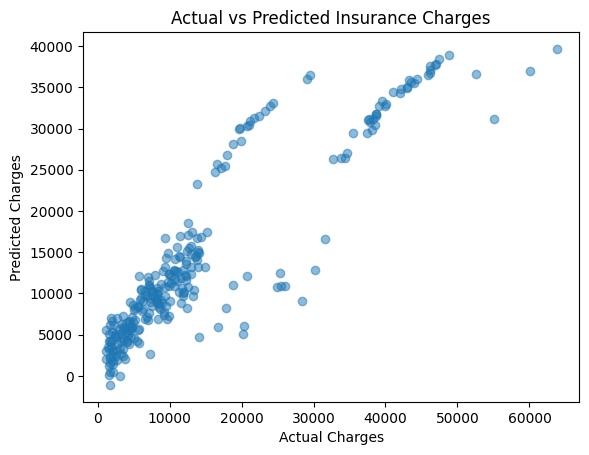

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()


In [62]:
import joblib
import os

# Create folder if not exists
os.makedirs("../src/models", exist_ok=True)

# Save the trained model
joblib.dump(model, "../src/models/insurance_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [63]:
# Save feature names
joblib.dump(X_train.columns.tolist(), "../src/models/insurance_features.pkl")

print("Feature names saved!")


Feature names saved!


In [64]:
import pickle

# Load the feature names (your project uses a .pkl file)
with open("../src/models/insurance_features.pkl", "rb") as f:
    feature_names = pickle.load(f)

feature_names


['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 4177.04556103632
MSE: 35478020.675235614
RMSE: 5956.342894363589
R2: 0.8069287081198011


In [66]:
import json

# Prepare metrics dictionary
metrics = {
    "MAE": float(mae),
    "MSE": float(mse),
    "RMSE": float(rmse),
    "R2": float(r2)
}

# Save metrics to JSON file
with open("../src/models/insurance_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Metrics saved successfully!")
metrics


Metrics saved successfully!


{'MAE': 4177.04556103632,
 'MSE': 35478020.675235614,
 'RMSE': 5956.342894363589,
 'R2': 0.8069287081198011}

In [67]:
import pickle

# Save model to file
with open("../src/models/insurance_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!


In [68]:
import numpy as np
import pandas as pd

# Get coefficients from the trained linear regression model
coefs = model.coef_  # 1D array, one value per feature

# Build a DataFrame with feature names and their importance
importance_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_importance": np.abs(coefs)
})

# Sort by absolute importance (largest first)
importance_df = importance_df.sort_values("abs_importance", ascending=False)

importance_df


,feature,coefficient,abs_importance
4,smoker_yes,23077.764593,23077.764593
6,region_southeast,-838.919616,838.919616
7,region_southwest,-659.139752,659.139752
2,children,533.009989,533.009989
5,region_northwest,-391.761455,391.761455
1,bmi,318.701441,318.701441
0,age,248.210720,248.210720
3,sex_male,-101.542054,101.542054


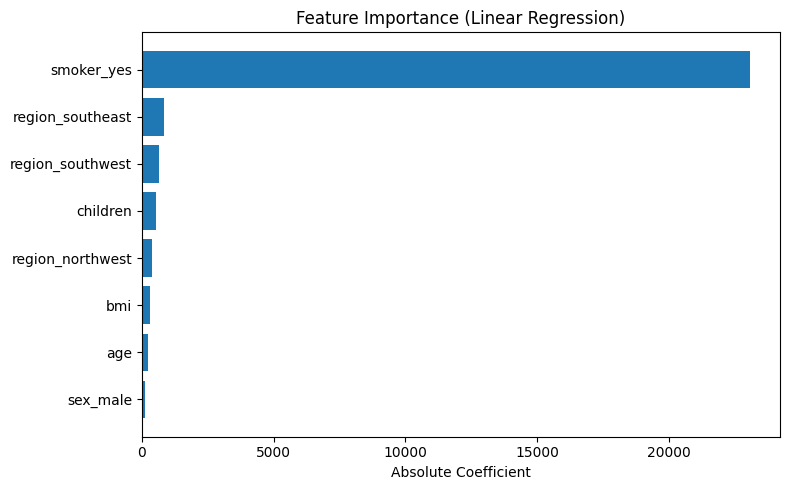

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(importance_df["feature"], importance_df["abs_importance"])
plt.xlabel("Absolute Coefficient")
plt.title("Feature Importance (Linear Regression)")
plt.gca().invert_yaxis()  # largest on top
plt.tight_layout()
plt.show()


In [70]:
# 6.2 Ridge Regression Model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("RIDGE REGRESSION RESULTS")
print("MAE:", mae_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)


RIDGE REGRESSION RESULTS
MAE: 4194.009577324492
MSE: 35656880.99907519
RMSE: 5971.338292131437
R2: 0.8059553507246429


In [71]:
# 6.3 Lasso Regression Model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Lasso model
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test)

# Metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("LASSO REGRESSION RESULTS")
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)


LASSO REGRESSION RESULTS
MAE: 4177.046408725187
MSE: 35478033.60943773
RMSE: 5956.343980113785
R2: 0.8069286377319085


In [72]:
# 6.4 Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("RANDOM FOREST RESULTS")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)


RANDOM FOREST RESULTS
MAE: 2627.478990152362
MSE: 21825601.95534809
RMSE: 4671.787875679726
R2: 0.8812251336072016


In [73]:
# 6.5 Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the model
gbr_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr_model.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test)

# Metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("GRADIENT BOOSTING RESULTS")
print("MAE:", mae_gbr)
print("MSE:", mse_gbr)
print("RMSE:", rmse_gbr)
print("R2:", r2_gbr)


GRADIENT BOOSTING RESULTS
MAE: 2532.873081755152
MSE: 19140742.563488886
RMSE: 4375.013435806671
R2: 0.8958361311047247


In [74]:
import pandas as pd

results = pd.DataFrame([
    ["Linear Regression", mae_lr, rmse_lr, r2_lr],
    ["Ridge", mae_ridge, rmse_ridge, r2_ridge],
    ["Lasso", mae_lasso, rmse_lasso, r2_lasso],
    ["Random Forest", mae_rf, rmse_rf, r2_rf],
    ["Gradient Boosting", mae_gbr, rmse_gbr, r2_gbr],
], columns=["Model", "MAE", "RMSE", "R2"])

results


,Model,MAE,RMSE,R2
0,Linear Regression,4177.045561,5956.342894,0.806929
1,Ridge,4194.009577,5971.338292,0.805955
2,Lasso,4177.046409,5956.343980,0.806929
3,Random Forest,2627.478990,4671.787876,0.881225
4,Gradient Boosting,2532.873082,4375.013436,0.895836


In [75]:
from pathlib import Path
import json
import joblib

# Final chosen model (Gradient Boosting)
final_model = gbr_model

# Feature names used by the model
feature_names = X_train.columns.tolist()

# Where to save (keep src/models as the canonical place)
models_dir = Path("src/models")
models_dir.mkdir(parents=True, exist_ok=True)

# 1) Save the trained model
joblib.dump(final_model, models_dir / "insurance_model.pkl")

# 2) Save the feature list
joblib.dump(feature_names, models_dir / "insurance_features.pkl")

# 3) Save the metrics for the selected model
metrics = {
    "model_name": "GradientBoostingRegressor",
    "mae": float(mae_gbr),
    "rmse": float(rmse_gbr),
    "r2": float(r2_gbr),
}

with open(models_dir / "insurance_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("Saved model, features, and metrics to:", models_dir)
metrics


Saved model, features, and metrics to: src/models


{'model_name': 'GradientBoostingRegressor',
 'mae': 2532.873081755152,
 'rmse': 4375.013435806671,
 'r2': 0.8958361311047247}